# Tabular RL Algorithms

In this assignment, you will solve the FrozenLake-v0 environment from [Gymnasium](https://gymnasium.farama.org/). You will be using this helper file to answer questions in your assignment. 


Frozen lake involves crossing a frozen lake from start to goal without falling into any holes by walking over the frozen lake. The player may not always move in the intended direction due to the slippery nature of the frozen lake. The game starts with the player at location [0,0] of the frozen lake grid world with the goal located at far extent of the world e.g. [3,3] for the 4x4 environment. Holes in the ice are distributed in set locations using a pre-determined map, and the player makes moves until they reach the goal or fall in a hole. The map is given below for your reference

        SFFF
        FHFH
        FFFH
        HFFG
    S : starting point, safe
    F : frozen surface, safe
    H : hole, fall to your doom
    G : goal, where the frisbee is located
    
    
## Action Space
The player/agent can take 4 discrete actions, in the range {0,3}
* 0: Move left
* 1: Move down
* 2: Move right 
* 4: Move up


## State Space
The environment consists of 16 states. The state is a value representing the player’s current position as current_row * nrows + current_col (where both the row and col start at 0).
For example, the goal position in the 4x4 map can be calculated as follows: 3 * 4 + 3 = 15.


## Starting State
The episode starts with the player in state [0] (location [0, 0]).


## Rewards 

* Reach goal: +1
* Reach hole: 0
* Reach frozen: 0

## Episode End
The episode ends if the following happens:
### 1.Termination:
* The player moves into a hole.
* The player reaches the goal at max(nrow) * max(ncol) - 1 (location [max(nrow)-1, max(ncol)-1]).

### 2.Truncation:
* The length of the episode is 100 for 4x4 environment.

For more info refer to source: https://gymnasium.farama.org/environments/toy_text/frozen_lake/

## The Environment Parameters
* Use discount factor, $\gamma = 0.9$
* The environment is slippery, ie., the transition kernel is stochastic.
* The transition kernel P is a dictionary. 
* P[state][action] is tuples with (probability, nextstate, reward, terminal)


### **Use the following code snippet to set up the gym environemnt for all the questions**

In [ ]:
pip install gymnasium

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import gymnasium as gym
env = gym.make('FrozenLake-v1', desc=None,map_name="4x4", is_slippery=True)#, render_mode="rgb_array_list")
gamma = 0.9

In [ ]:
#Obtaining environment details 
print('Number of Actions', env.action_space.n) 
print('Number of States ', env.observation_space.n)
print('P[10,3]', env.P[10][3])

Number of Actions 4
Number of States  16
P[10,3] [(0.3333333333333333, 11, 0.0, True), (0.3333333333333333, 6, 0.0, False), (0.3333333333333333, 9, 0.0, False)]


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Q1 Q-Value Iteration

In [ ]:
#1 Q-Value Iteration

def QVI(env, num_iter=100, gamma = 0.9):

    S = env.observation_space.n
    A = env.action_space.n

    Q = np.zeros(S*A).reshape((S,A))
    Qnext = np.zeros(S*A).reshape((S,A))

    Qk_diffs = []
    
    for i in range(num_iter):
        for s in range(env.observation_space.n):
            for a in range(env.action_space.n):

                # calculating expected value part
                expected = 0

                for prob, s1, rew, status in env.P[s][a]:
                    #expected += prob * np.max(Q[s1,:])
                    expected += prob*(rew + gamma * np.max(Q[s1,:]))

                #Q[s][a] = rew + gamma * expected
                Qnext[s][a] = expected

        diff = Qnext - Q
        Qk_diffs.append(np.max(diff))
        #Qk_diffs.append(np.linalg.norm(diff))
        Q = np.copy(Qnext)

        if(np.linalg.norm(diff, np.inf)<0.001):
          print(i)
          break

    # find optimal policy
    optimal_policy = {}

    for i in range(S):
        optimal_policy[i] = np.argmax(Q[i])

    # optimal value function
    V = np.zeros(S)

    for s in range(S):
        V[s] = Q[s][optimal_policy[s]]
    #print(Q)

    return Q, V, optimal_policy, Qk_diffs

In [ ]:
Q, V, pi, Qk_diffs = QVI(env, 100)

36


In [ ]:
V

array([0.06700345, 0.0598181 , 0.07324582, 0.05453296, 0.09013602,
       0.        , 0.1115799 , 0.        , 0.14404164, 0.24655338,
       0.29895326, 0.        , 0.        , 0.379252  , 0.63866089,
       0.        ])

In [ ]:
pi_qvi = pi

In [ ]:
pi

{0: 0,
 1: 3,
 2: 0,
 3: 3,
 4: 0,
 5: 0,
 6: 0,
 7: 0,
 8: 3,
 9: 1,
 10: 0,
 11: 0,
 12: 0,
 13: 2,
 14: 1,
 15: 0}

Text(0, 0.5, '||Qk - Qk-1||')

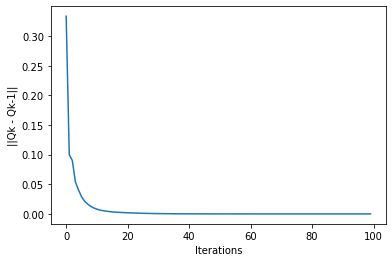

In [ ]:
plt.plot(range(len(Qk_diffs)),Qk_diffs)
plt.xlabel('Iterations')
plt.ylabel('||Qk - Qk-1||')

## Generating a Heatmap 
* Use the following function fancy_visual to obtain a heat map. The arguments to the function are the value function and its corresponding policy. 
* This function also prints the value function and policy. 

Value Function [0.06889059 0.06141431 0.07440957 0.05580711 0.09185426 0.
 0.1122081  0.         0.14543612 0.2474968  0.29961748 0.
 0.         0.37993579 0.63902009 0.        ]
Policy {0: 0, 1: 3, 2: 0, 3: 3, 4: 0, 5: 0, 6: 0, 7: 0, 8: 3, 9: 1, 10: 0, 11: 0, 12: 0, 13: 2, 14: 1, 15: 0}


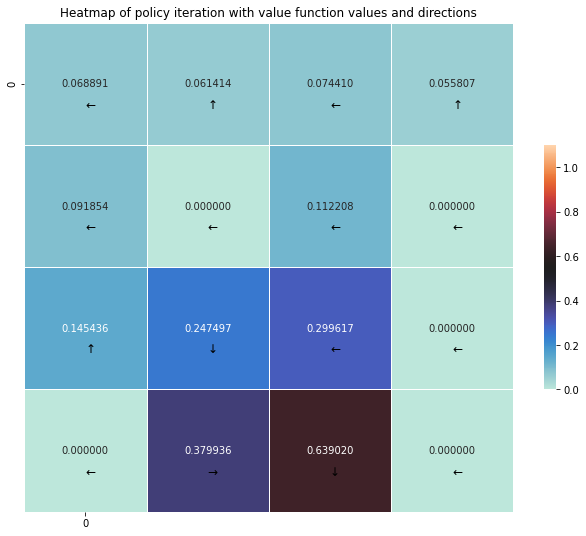

In [ ]:
%matplotlib inline
import seaborn
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import numpy as np
def fancy_visual(value_func,policy_int):    
    grid = 4    
    f, ax = plt.subplots(figsize=(11, 9))
    cmap = seaborn.diverging_palette(220, 10, as_cmap=True)
    reshaped = np.reshape(value_func,(grid,grid))
    seaborn.heatmap(reshaped, cmap="icefire",vmax=1.1, robust = True,
                square=True, xticklabels=grid+1, yticklabels=grid+1,
                linewidths=.5, cbar_kws={"shrink": .5}, ax=ax, annot=True, fmt="f")
    counter = 0
    for j in range(0, 4):
        for i in range(0, 4):
            if int(policy_int[counter]) == 1:
                plt.text(i+0.5, j+0.7, u'\u2193', fontsize=12)
            elif int(policy_int[counter]) == 3:
                plt.text(i+0.5, j+0.7, u'\u2191', fontsize=12)
            elif int(policy_int[counter]) == 0:
                plt.text(i+0.5, j+0.7, u'\u2190', fontsize=12)
            else:
                plt.text(i+0.5, j+0.7, u'\u2192', fontsize=12)
            counter=counter+1

    plt.title('Heatmap of policy iteration with value function values and directions')
    print('Value Function',value_func)
    print('Policy',policy_int)
    plt.show()

#test_value = np.random.rand(16) #Random Value Function (only for plotting)
#test_policy = np.random.randint(0,3,16) #Random Policy (only for plotting)
fancy_visual(V,pi)

## Q2 Policy Evaluation

In [ ]:
S = env.observation_space.n
A = env.action_space.n

In [ ]:
P = np.zeros(S*S*A).reshape((S,S,A))
P.shape

(16, 16, 4)

In [ ]:
# compute transition prob matrix P(s'/s,a)

P = np.zeros(S*S*A).reshape((S,S,A))

for s in range(S): #s
    for a in range(A): #a
        for prob, s1, r, status in env.P[s][a]:
            P[s][s1][a] += prob


In [ ]:
#computing matrix for P(s'/s) according to policy pi

# uniform dist
P_uni = np.zeros(S*S).reshape((S,S))
P_opt = np.zeros(S*S).reshape((S,S))

for s in range(S):
  for s1 in range(S):
    P_uni[s][s1] = np.mean(P[s][s1])
    P_opt[s][s1] = P[s][s1][pi[s]]


In [ ]:
for i in range(S):
  print(np.sum(P_uni[i]))

In [ ]:
# computing pi matrix

pi_mat_uni = 0.25*np.ones(S*A).reshape((S,A))
pi_mat_opt = np.zeros(S*A).reshape((S,A))

for s in range(S):
  for a in range(A):
    if(pi[s]==a):
      pi_mat_opt[s][a] = 1
      

In [ ]:
pi_mat_opt, P[0][0]

(array([[1., 0., 0., 0.],
        [0., 0., 0., 1.],
        [1., 0., 0., 0.],
        [0., 0., 0., 1.],
        [1., 0., 0., 0.],
        [1., 0., 0., 0.],
        [1., 0., 0., 0.],
        [1., 0., 0., 0.],
        [0., 0., 0., 1.],
        [0., 1., 0., 0.],
        [1., 0., 0., 0.],
        [1., 0., 0., 0.],
        [1., 0., 0., 0.],
        [0., 0., 1., 0.],
        [0., 1., 0., 0.],
        [1., 0., 0., 0.]]),
 array([0.66666667, 0.33333333, 0.33333333, 0.66666667]))

In [ ]:
# computing rpi 

rpi_opt = np.zeros(S)
rpi_uni = np.zeros(S)

for s in range(S):
  for a in range(A):
    for prob,s1,r,stat in env.P[s][a]:
      rpi_opt[s] += r*prob*pi_mat_opt[s][a]
      rpi_uni[s] += r*prob*pi_mat_uni[s][a]

      

In [ ]:
# opt policy
gamma = 0.9
V_opt_lin = np.linalg.solve((np.eye(S)-gamma*P_opt), rpi_opt)
V_uni_lin = np.linalg.solve((np.eye(S)-gamma*P_uni), rpi_uni)

In [ ]:
V_opt_lin

array([6.88909049e-02, 6.14145715e-02, 7.44097620e-02, 5.58073215e-02,
       9.18545399e-02, 1.85037171e-16, 1.12208206e-01, 0.00000000e+00,
       1.45436355e-01, 2.47496955e-01, 2.99617593e-01, 0.00000000e+00,
       0.00000000e+00, 3.79935901e-01, 6.39020148e-01, 0.00000000e+00])

In [ ]:
V_uni_lin

array([ 4.47726069e-03,  4.22245661e-03,  1.00667565e-02,  4.11821857e-03,
        6.72195841e-03,  1.35138317e-16,  2.63337084e-02,  0.00000000e+00,
        1.86761516e-02,  5.76070083e-02,  1.06971947e-01,  0.00000000e+00,
       -5.69561934e-17,  1.30383049e-01,  3.91490160e-01,  0.00000000e+00])

In [ ]:
# part b : Iterative Approach

In [ ]:
def compute_rpi(env, policy_mat):

  S = env.observation_space.n
  A = env.action_space.n

  r_pi = np.zeros(S)

  for s in range(S):
    for a in range(A):
      for prob,s1,r,stat in env.P[s][a]:
        r_pi[s] += r*prob*policy_mat[s][a]

  return r_pi


In [ ]:
def compute_P(env):
  
  S = env.observation_space.n
  A = env.action_space.n

  P = np.zeros(S*S*A).reshape((S,S,A))

  for s in range(S): #s
    for a in range(A): #a
      for prob, s1, r, status in env.P[s][a]:
          P[s][s1][a] += prob

  return P


def compute_P_s1_s(env, policy_mat):

    S = env.observation_space.n
    A = env.action_space.n

    P_s1_s = np.zeros(S*S).reshape((S,S))

    S = env.observation_space.n
    A = env.action_space.n

    P = compute_P(env)

    #print(P.shape, P[0].shape, P[0][0].shape)
    #print(policy_mat[0].shape)

    for s in range(S):
      for s1 in range(S):
        #P_uni[s][s1] = np.mean(P[s][s1])
        P_s1_s[s][s1] = np.dot(policy_mat[s],P[s][s1].T)
        #P_opt[s][s1] = P[s][s1][pi[s]]

    return P_s1_s



In [ ]:
def value_iteration(env, policy_mat, num_iter = 100, gamma = 0.9):

  S = env.observation_space.n
  A = env.action_space.n

  r_pi = compute_rpi(env, policy_mat)

  Vnext = np.zeros(S)
  V = np.zeros(S)

  P_s1_s = compute_P_s1_s(env, policy_mat)

  for i in range(num_iter):
    Vnext = r_pi + gamma*np.matmul(P_s1_s,V)
    V = Vnext

  return Vnext   


In [ ]:
value_iteration(env, pi_mat_opt)

array([0.06889058, 0.0614143 , 0.07440956, 0.0558071 , 0.09185425,
       0.        , 0.1122081 , 0.        , 0.14543612, 0.2474968 ,
       0.29961748, 0.        , 0.        , 0.37993579, 0.63902009,
       0.        ])

In [ ]:
Value Function [0.06889059 0.06141431 0.07440957 0.05580711 0.09185426 0.
 0.1122081  0.         0.14543612 0.2474968  0.29961748 0.
 0.         0.37993579 0.63902009 0.        ]

In [ ]:
value_iteration(env, pi_mat_uni)

array([0.00447726, 0.00422246, 0.01006676, 0.00411822, 0.00672196,
       0.        , 0.02633371, 0.        , 0.01867615, 0.05760701,
       0.10697195, 0.        , 0.        , 0.13038305, 0.39149016,
       0.        ])

# Q3 : Policy Iteration

In [ ]:
def policy_improvement(env, policy_mat, V):
  
  S = env.observation_space.n
  A = env.action_space.n
  policy_next = np.zeros_like(policy_mat)

  #print("policy imp")
  for s in range(S):
    
    values = []
    
    for a in range(A):
      
      value = 0.0
      
      for prob, s1, r, stat in env.P[s][a]:
        value+= prob*(r + gamma*V[s1])
      
      values.append(value)
    
    #print(values)
    policy_next[s][np.argmax(values)] = 1.0

  return policy_next

def policy_iteration(env, num_iter):
  
  S = env.observation_space.n
  A = env.action_space.n

  # consider random policy
  pi = np.zeros(S*A).reshape((S,A))
  pi[:,0] = 1.0 # all zero action
  
  Q_diffs = []
  Vpi_prev = np.zeros(S)
  print_done = False

  for i in range(num_iter):
    # evaluate policy
    Vpi = value_iteration(env, pi)
    #print("Iteration: {}".format(i))
    #print(pi)
    #print(Vpi)
    pi_next = policy_improvement(env, pi, Vpi)
    #print(pi_next)
    
    #if(pi==pi_next).all():
    #  print(i)
    #  break

    diff = Vpi - Vpi_prev

    if(i>0):
      Q_diffs.append(diff)
    pi = pi_next 

    #print(Vpi)
    if(np.linalg.norm(diff, np.inf)<0.001):
      if(i!=0 and print_done==False):
        print("Converged at iteration {}".format(i))
        print_done = True

        #break

    Vpi_prev = np.copy(Vpi)

  plot(['iterations','||Vk-Vk-1||'], Q_diffs, 1)

  return pi_next, Vpi
    


Converged at iteration 6


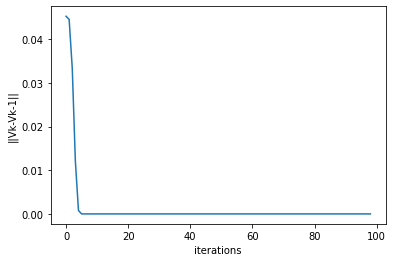

In [ ]:
pol_mat, Vpi_pol_iter = policy_iteration(env,100)

In [ ]:
pol_mat, Vpi_pol_iter = policy_iteration(env,20)

0


In [ ]:
Vpi_pol_iter

array([0.06889058, 0.0614143 , 0.07440956, 0.0558071 , 0.09185425,
       0.        , 0.1122081 , 0.        , 0.14543612, 0.2474968 ,
       0.29961748, 0.        , 0.        , 0.37993579, 0.63902009,
       0.        ])

In [ ]:
opt_pol = {}
for i in range(S):
  opt_pol[i] = np.argmax(pol_mat[i])

opt_pol

{0: 0,
 1: 3,
 2: 0,
 3: 3,
 4: 0,
 5: 0,
 6: 0,
 7: 0,
 8: 3,
 9: 1,
 10: 0,
 11: 0,
 12: 0,
 13: 2,
 14: 1,
 15: 0}

# Q Learning 
* Q learning is a model free approach, thus you will not use the transition kernel. 
* You can reset the environment using env.reset()
* env.step(action) takes in action as an argument and gives next state,reward,terminal and info as the output 

In [ ]:
state, info = env.reset() #Reset the env
max_step = 20 
for step in range(max_step):    
    action = env.action_space.sample() #Random Action
    n_state,reward,terminal,truncated,info = env.step(action) #Take a step 
    print("Time:",step,'State:',state,'Action:',action,'Reward:',reward,'Next State:',n_state,'Terminal:',terminal)
    state = n_state 
    if terminal or truncated: #Episode ends if the termination or truncation is true
        break   

Time: 0 State: 0 Action: 3 Reward: 0.0 Next State: 0 Terminal: False
Time: 1 State: 0 Action: 1 Reward: 0.0 Next State: 1 Terminal: False
Time: 2 State: 1 Action: 2 Reward: 0.0 Next State: 2 Terminal: False
Time: 3 State: 2 Action: 2 Reward: 0.0 Next State: 6 Terminal: False
Time: 4 State: 6 Action: 0 Reward: 0.0 Next State: 2 Terminal: False
Time: 5 State: 2 Action: 0 Reward: 0.0 Next State: 1 Terminal: False
Time: 6 State: 1 Action: 2 Reward: 0.0 Next State: 5 Terminal: True


## Q1 Tabular Q-Learning

Tabular Q-Learning

In [ ]:
Q_opt_QVI, V, pi, Qk_diffs = QVI(env, 100)

36


In [ ]:
Q_opt_QVI

array([[0.06724288, 0.06508727, 0.06508727, 0.0581475 ],
       [0.03804647, 0.04207478, 0.03991917, 0.06002021],
       [0.07339314, 0.06777929, 0.0718076 , 0.05627906],
       [0.03833363, 0.03833363, 0.03271977, 0.05469352],
       [0.09035433, 0.0702533 , 0.06331353, 0.04714184],
       [0.        , 0.        , 0.        , 0.        ],
       [0.11165972, 0.08968598, 0.11165972, 0.02197374],
       [0.        , 0.        , 0.        , 0.        ],
       [0.0702533 , 0.11717851, 0.10100682, 0.14421931],
       [0.15698809, 0.24667407, 0.20346158, 0.13289847],
       [0.29903825, 0.26556428, 0.22507224, 0.10743998],
       [0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        ],
       [0.18774162, 0.30537387, 0.37933988, 0.26556428],
       [0.39505985, 0.6387072 , 0.61461758, 0.53679491],
       [0.        , 0.        , 0.        , 0.        ]])

In [ ]:
Q_opt_QVI

array([[0.06724288, 0.06508727, 0.06508727, 0.0581475 ],
       [0.03804647, 0.04207478, 0.03991917, 0.06002021],
       [0.07339314, 0.06777929, 0.0718076 , 0.05627906],
       [0.03833363, 0.03833363, 0.03271977, 0.05469352],
       [0.09035433, 0.0702533 , 0.06331353, 0.04714184],
       [0.        , 0.        , 0.        , 0.        ],
       [0.11165972, 0.08968598, 0.11165972, 0.02197374],
       [0.        , 0.        , 0.        , 0.        ],
       [0.0702533 , 0.11717851, 0.10100682, 0.14421931],
       [0.15698809, 0.24667407, 0.20346158, 0.13289847],
       [0.29903825, 0.26556428, 0.22507224, 0.10743998],
       [0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        ],
       [0.18774162, 0.30537387, 0.37933988, 0.26556428],
       [0.39505985, 0.6387072 , 0.61461758, 0.53679491],
       [0.        , 0.        , 0.        , 0.        ]])

In [ ]:
state, info = env.reset()

S = env.observation_space.n
A = env.action_space.n

Q = np.zeros(S*A).reshape((S,A)) #init
Qnext = np.zeros(S*A).reshape((S,A))

num_episodes = 100000
episode_len = 100

alpha = 0.5
eps = 0.5

cum_rewards = []
q_diffs = []

for i in range(num_episodes):

  if(i%1000==0):
    alpha = alpha*0.7
    eps = eps*0.7

  state, info = env.reset() #restart episode
  cum_reward = 0

  for step in range(episode_len):
    best_action = np.argmax(Q[state])

    actions = [0,1,2,3]
    if(np.random.uniform(0,1.0)<eps):
      actions.remove(np.argmax(Q[state]))
      action = actions[np.random.randint(3)]
    else:
      action = np.argmax(Q[state])
    
    #action = env.action_space.sample() #Random Action
    
    #print(action)
    n_state,reward,terminal,truncated,info = env.step(action) #Take a step

    Q[state][action] += alpha*(reward + gamma* np.max(Q[n_state]) - Q[state][action]) 

    cum_reward += np.power(gamma, step)*reward
    state = n_state

    if(terminal):
      break

  cum_rewards.append(cum_reward)
  q_diffs.append(np.linalg.norm((Q-Q_opt_QVI)))


  if(np.linalg.norm((Q-Q_opt_QVI))< 0.0001):
    print("converged in episode: {}".format(i))
    break
  #break


In [ ]:
Q

array([[0.06948031, 0.06133388, 0.06107116, 0.05786403],
       [0.03163367, 0.03688761, 0.03389501, 0.0604807 ],
       [0.07370742, 0.05277824, 0.05532684, 0.04536059],
       [0.03555709, 0.03171504, 0.02762581, 0.04049583],
       [0.09271984, 0.06809523, 0.06545005, 0.04951213],
       [0.        , 0.        , 0.        , 0.        ],
       [0.1119248 , 0.07966829, 0.080969  , 0.0181551 ],
       [0.        , 0.        , 0.        , 0.        ],
       [0.07410653, 0.12325768, 0.0955382 , 0.14707125],
       [0.14498849, 0.25004443, 0.18075071, 0.10978479],
       [0.30154216, 0.20972973, 0.22535725, 0.10514387],
       [0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        ],
       [0.1802798 , 0.26554971, 0.38172472, 0.25501768],
       [0.3998549 , 0.64029773, 0.53564943, 0.49807985],
       [0.        , 0.        , 0.        , 0.        ]])

In [ ]:
Q_opt_QVI

array([[0.06724288, 0.06508727, 0.06508727, 0.0581475 ],
       [0.03804647, 0.04207478, 0.03991917, 0.06002021],
       [0.07339314, 0.06777929, 0.0718076 , 0.05627906],
       [0.03833363, 0.03833363, 0.03271977, 0.05469352],
       [0.09035433, 0.0702533 , 0.06331353, 0.04714184],
       [0.        , 0.        , 0.        , 0.        ],
       [0.11165972, 0.08968598, 0.11165972, 0.02197374],
       [0.        , 0.        , 0.        , 0.        ],
       [0.0702533 , 0.11717851, 0.10100682, 0.14421931],
       [0.15698809, 0.24667407, 0.20346158, 0.13289847],
       [0.29903825, 0.26556428, 0.22507224, 0.10743998],
       [0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        ],
       [0.18774162, 0.30537387, 0.37933988, 0.26556428],
       [0.39505985, 0.6387072 , 0.61461758, 0.53679491],
       [0.        , 0.        , 0.        , 0.        ]])

a) Plot Gk

In [ ]:
def plot(name, y, window=1):
    i = 0
    new_y = []
    while i < len(y):
        new_y.append(np.mean(y[i: i+window]))
        i += window
    plt.plot(new_y)
    plt.ylabel= name[1]
    plt.xlabel = name[0]
    plt.show()

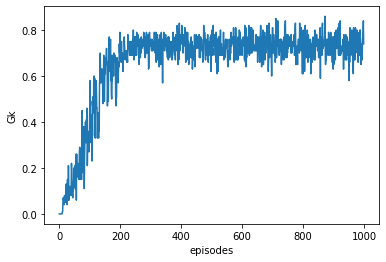

In [ ]:
plot(['episodes','Gk'], cum_rewards[:100000], 100)

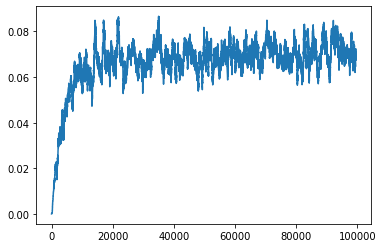

In [ ]:
def sliding_window_smoothing(x, window_size):
    """
    Smooths the input list of values using a sliding window of the specified size.
    
    Arguments:
    x -- the list of values to be smoothed
    window_size -- the size of the sliding window to use
    
    Returns:
    A list of the smoothed values.
    """
    half_window = int(window_size / 2)
    padded_x = np.pad(x, (half_window, half_window), mode='edge')
    smoothed_x = []
    for i in range(half_window, len(x) + half_window):
        smoothed_x.append(np.mean(padded_x[i - half_window:i + half_window + 1]))
    return smoothed_x

smoothed_x = sliding_window_smoothing(cum_rewards, 500)

# Plot the original data and the smoothed data
#plt.plot(cum_rewards, label='Original')

plt.plot(range(len(smoothed_x[:-500])),smoothed_x[:-500])#, xlabel = 'num of episodes', ylabel='Gk')
plt.xlabel = 'num of episodes'
plt.ylabel = 'Gk'
#plt.legend()
plt.show()

b) Plot ||Qk-Q*||

In [ ]:
smoothed_q_diffs = sliding_window_smoothing(q_diffs, 500)

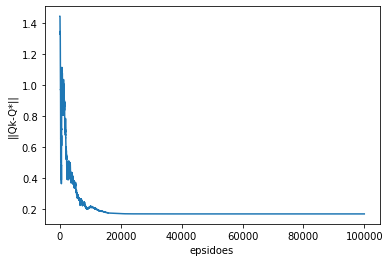

In [ ]:
plt.plot(range(len(smoothed_q_diffs[:-500])),smoothed_q_diffs[:-500])#, xlabel = 'num of episodes', ylabel='Gk')
plt.xlabel = 'episodes'
plt.ylabel = '||Qk-Q*||'
#plt.legend()
plt.show()

c) policy and Q-function

In [ ]:
# Q func
Q

array([[0.06948031, 0.06133388, 0.06107116, 0.05786403],
       [0.03163367, 0.03688761, 0.03389501, 0.0604807 ],
       [0.07370742, 0.05277824, 0.05532684, 0.04536059],
       [0.03555709, 0.03171504, 0.02762581, 0.04049583],
       [0.09271984, 0.06809523, 0.06545005, 0.04951213],
       [0.        , 0.        , 0.        , 0.        ],
       [0.1119248 , 0.07966829, 0.080969  , 0.0181551 ],
       [0.        , 0.        , 0.        , 0.        ],
       [0.07410653, 0.12325768, 0.0955382 , 0.14707125],
       [0.14498849, 0.25004443, 0.18075071, 0.10978479],
       [0.30154216, 0.20972973, 0.22535725, 0.10514387],
       [0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        ],
       [0.1802798 , 0.26554971, 0.38172472, 0.25501768],
       [0.3998549 , 0.64029773, 0.53564943, 0.49807985],
       [0.        , 0.        , 0.        , 0.        ]])

In [ ]:
# policy

pol = {}

for s in range(S):
  pol[s] = np.argmax(Q[s])
pol

{0: 0,
 1: 3,
 2: 0,
 3: 3,
 4: 0,
 5: 0,
 6: 0,
 7: 0,
 8: 3,
 9: 1,
 10: 0,
 11: 0,
 12: 0,
 13: 2,
 14: 1,
 15: 0}

## Q2 : Behavioral Policy

In [ ]:
state, info = env.reset()

S = env.observation_space.n
A = env.action_space.n

Q = np.zeros(S*A).reshape((S,A)) #init
Qnext = np.zeros(S*A).reshape((S,A))

num_episodes = 100000
episode_len = 100

alpha = 0.5
#eps = 0.5

cum_rewards = []
q_diffs = []

for i in range(num_episodes):

  if(i%1000==0):
    alpha = alpha*0.7
    #eps = eps*0.8

  state, info = env.reset()
  cum_reward = 0

  for step in range(episode_len):
    #best_action = np.argmax(Q[state])

    actions = [0,1,2,3]
    #if(np.random.uniform(0,1.0)<eps):
    #  actions.remove(np.argmax(Q[state]))
    #  action = actions[np.random.randint(3)]
    #else:
    #  action = np.argmax(Q[state])
    
    action = np.random.randint(0,4) # action according to uniform dist
    
    #print(action)
    n_state,reward,terminal,truncated,info = env.step(action) #Take a step

    Q[state][action] += alpha*(reward + gamma* np.max(Q[n_state]) - Q[state][action]) 

    cum_reward += np.power(gamma, step)*reward
    
    state = n_state

    if(terminal):
      break
  
  cum_rewards.append(cum_reward)
  q_diffs.append(np.linalg.norm((Q-Q_opt_QVI)))

  if(np.linalg.norm((Q-Q_opt_QVI), np.inf)<0.001):
    print("converged in episode : {}".format(i))
    break
  

  #break


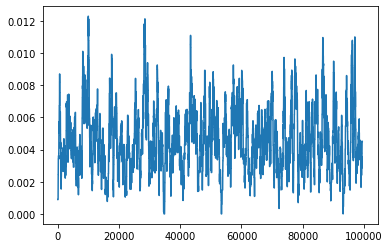

In [ ]:
smoothed_cum_rewards = sliding_window_smoothing(cum_rewards, 500)
plt.plot(range(len(smoothed_cum_rewards[:-500])),smoothed_cum_rewards[:-500])#, xlabel = 'num of episodes', ylabel='Gk')
plt.xlabel = 'num of episodes'
plt.ylabel = 'Gk'
#plt.legend()
plt.show()

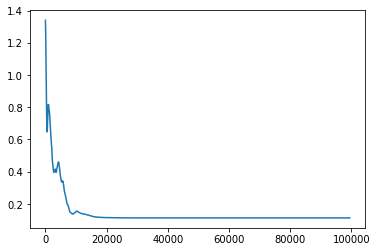

In [ ]:
smoothed_q_diffs = sliding_window_smoothing(q_diffs, 500)
plt.plot(range(len(smoothed_q_diffs[:-500])),smoothed_q_diffs[:-500])#, xlabel = 'num of episodes', ylabel='Gk')
plt.xlabel = 'num of episodes'
plt.ylabel = 'Gk'
#plt.legend()
plt.show()

In [ ]:
# Q func
Q

array([[0.08275112, 0.08239116, 0.08239574, 0.07414707],
       [0.05033148, 0.05619552, 0.05685991, 0.08088915],
       [0.1020835 , 0.09483389, 0.10324428, 0.08166297],
       [0.05790232, 0.05752851, 0.04841419, 0.08170378],
       [0.11063177, 0.08751997, 0.0795587 , 0.05860786],
       [0.        , 0.        , 0.        , 0.        ],
       [0.14809223, 0.09388672, 0.14339371, 0.03166265],
       [0.        , 0.        , 0.        , 0.        ],
       [0.08687523, 0.139435  , 0.12283146, 0.17476901],
       [0.19295482, 0.28919807, 0.23976179, 0.16075982],
       [0.34308726, 0.28072353, 0.25902271, 0.13331267],
       [0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        ],
       [0.22224621, 0.31251456, 0.41728717, 0.29430167],
       [0.43735113, 0.64059068, 0.6316203 , 0.56884172],
       [0.        , 0.        , 0.        , 0.        ]])

In [ ]:
ValFn = np.zeros(S)
for i in range(S):
 ValFn[i] = max(Q[i]) 

ValFn

array([0.08275112, 0.08088915, 0.10324428, 0.08170378, 0.11063177,
       0.        , 0.14809223, 0.        , 0.17476901, 0.28919807,
       0.34308726, 0.        , 0.        , 0.41728717, 0.64059068,
       0.        ])

In [ ]:
# policy

pol = {}

for s in range(S):
  pol[s] = np.argmax(Q[s])
pol

{0: 0,
 1: 3,
 2: 2,
 3: 3,
 4: 0,
 5: 0,
 6: 0,
 7: 0,
 8: 3,
 9: 1,
 10: 0,
 11: 0,
 12: 0,
 13: 2,
 14: 1,
 15: 0}

In [ ]:
# better policy : greedy policy

In [ ]:
state, info = env.reset()

S = env.observation_space.n
A = env.action_space.n

Q = np.zeros(S*A).reshape((S,A)) #init
Qnext = np.zeros(S*A).reshape((S,A))

num_episodes = 100000
episode_len = 100

alpha = 0.5
eps = 0.5

cum_rewards = []
q_diffs = []

for i in range(num_episodes):

  if(i%1000==0):
    alpha = alpha*0.7
    eps = eps*0.7

  state, info = env.reset() #restart episode
  cum_reward = 0

  for step in range(episode_len):
    #best_action = np.argmax(Q[state])

    actions = [0,1,2,3]
    
    '''
    if(np.random.uniform(0,1.0)<eps and i<1000):
      actions.remove(np.argmax(Q[state]))
      action = actions[np.random.randint(3)]
    else:
      action = np.argmax(Q[state])
    '''

    if(i<5000 and step<20):
      #print("here")
      action = actions[np.random.randint(4)]
    else:
      action = np.argmax(Q[state])
    #if(i<1000 and step < 20):
    #  action = np.random.randint(4)
    #else:
    #  action = np.argmax(Q[state])
    
    #action = env.action_space.sample() #Random Action
    
    #print(action)
    n_state,reward,terminal,truncated,info = env.step(action) #Take a step

    Q[state][action] += alpha*(reward + gamma* np.max(Q[n_state]) - Q[state][action]) 

    cum_reward += np.power(gamma, step)*reward
    state = n_state

    if(terminal):
      break

  cum_rewards.append(cum_reward)
  q_diffs.append(np.linalg.norm((Q-Q_opt_QVI)))


  if(np.linalg.norm((Q-Q_opt_QVI))< 0.0001):
    print("converged in episode: {}".format(i))
    break
  #break

In [ ]:
Q

array([[0.04523622, 0.06223134, 0.04526117, 0.04520145],
       [0.0405725 , 0.03946076, 0.03915595, 0.05690543],
       [0.04410924, 0.04409575, 0.07018128, 0.04409249],
       [0.03328851, 0.03425061, 0.03389024, 0.05267851],
       [0.08849703, 0.0547195 , 0.05548899, 0.02470326],
       [0.        , 0.        , 0.        , 0.        ],
       [0.05550195, 0.05591351, 0.11134051, 0.03062688],
       [0.        , 0.        , 0.        , 0.        ],
       [0.07874035, 0.08213989, 0.0833208 , 0.14424681],
       [0.14984554, 0.2477773 , 0.14471471, 0.14367254],
       [0.29926267, 0.20778302, 0.16252012, 0.1221865 ],
       [0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        ],
       [0.24195288, 0.24213207, 0.38199689, 0.23358029],
       [0.41258866, 0.63677977, 0.45610501, 0.45731004],
       [0.        , 0.        , 0.        , 0.        ]])

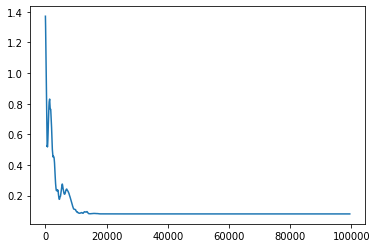

In [ ]:
smoothed_q_diffs = sliding_window_smoothing(q_diffs, 500)
plt.plot(range(len(smoothed_q_diffs[:-500])),smoothed_q_diffs[:-500])#, xlabel = 'num of episodes', ylabel='Gk')
plt.xlabel = 'num of episodes'
plt.ylabel = 'Gk'
#plt.legend()
plt.show()

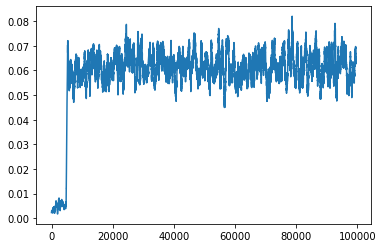

In [ ]:
smoothed_cum_rewards = sliding_window_smoothing(cum_rewards, 500)
plt.plot(range(len(smoothed_cum_rewards[:-500])),smoothed_cum_rewards[:-500])#, xlabel = 'num of episodes', ylabel='Gk')
plt.xlabel = 'num of episodes'
plt.ylabel = 'Gk'
#plt.legend()
plt.show()

## Q3 : TD-Learning

a) Monte Carlo

In [ ]:
def MonteCarlo(env, policy=None, is_uni=False):
  S = env.observation_space.n
  A = env.action_space.n
  num_episodes = 100000
  num_steps = 100

  alpha = 0.5
  eps = 0.5
  Vpi = np.zeros(S)
  gamma = 0.9

  for k in range(num_episodes):
    state, info = env.reset()

    if(k%1000==0):
      alpha*=0.8
      eps*=0.8

    episode = []

    for i in range(num_steps):
      
      #if(is_uni):
      #  action = np.random.randint(0,4)
      #else:
      #  action = policy[state] # action acc to policy

      if(is_uni):
        action = np.random.randint(0,4)
      else:
        actions = [0,1,2,3]
        #if(np.random.uniform(0,1.0)<eps):
        #  actions.remove(policy[state])
        #  action = actions[np.random.randint(3)]
        #else:
        action = policy[state] # action according to uniform dist
      
      n_state,reward,terminal,truncated,info = env.step(action) #Take a step

      episode.append((state, action, reward, n_state))

      state = n_state

      if(terminal):
        #print("here")
        break
    
    G = 0
    Gt = np.zeros(len(episode))
    #state_visit_counts = np.zeros(S)
    for i in range(len(episode)-1,-1,-1):
      curr_state, action, reward, _ = episode[i]
      G = reward + gamma*G
      #state_visit_counts[state]+=1
      Gt[i] = G

    for i in range(len(episode)):
      curr_state, action, reward, _ = episode[i]
      Vpi[curr_state]+= alpha*(Gt[i]-Vpi[curr_state]) 


  return Vpi

In [ ]:
Vpi_opt_MC = MonteCarlo(env, pi_qvi)

In [ ]:
Vpi_opt_MC

array([0.06735581, 0.05621155, 0.06836778, 0.        , 0.09024782,
       0.        , 0.1118974 , 0.        , 0.14279557, 0.24530788,
       0.29992916, 0.        , 0.        , 0.37567631, 0.6353193 ,
       0.        ])

In [ ]:
Vpi_opt_MC

array([0.06572495, 0.06015774, 0.06947845, 0.02264201, 0.0879466 ,
       0.        , 0.10651961, 0.        , 0.14113603, 0.24357756,
       0.29648043, 0.        , 0.        , 0.37474355, 0.63704478,
       0.        ])

In [ ]:
'''
[0.06889059 0.06141431 0.07440957 0.05580711 0.09185426 0.
 0.1122081  0.         0.14543612 0.2474968  0.29961748 0.
 0.         0.37993579 0.63902009 0.        ]

In [ ]:
Vpi_uni_MC = MonteCarlo(env, None, True)

In [ ]:
Vpi_uni_MC

array([0.00411236, 0.00368242, 0.00734796, 0.00296496, 0.0061496 ,
       0.        , 0.01784309, 0.        , 0.01573661, 0.05007741,
       0.08901134, 0.        , 0.        , 0.10830814, 0.3332299 ,
       0.        ])

In [ ]:
'''
array([ 4.47726069e-03,  4.22245661e-03,  1.00667565e-02,  4.11821857e-03,
        6.72195841e-03,  1.35138317e-16,  2.63337084e-02,  0.00000000e+00,
        1.86761516e-02,  5.76070083e-02,  1.06971947e-01,  0.00000000e+00,
       -5.69561934e-17,  1.30383049e-01,  3.91490160e-01,  0.00000000e+00])

'''

b) TD Learning

In [ ]:
def TD_learning(env, policy=None, is_uni=False):
  S = env.observation_space.n
  A = env.action_space.n
  num_episodes = 120000
  num_steps = 100

  alpha = 0.5
  Vpi = np.zeros(S)
  gamma = 0.9
  eps = 0.5

  for k in range(num_episodes):
    state, info = env.reset()

    if(k%1000==0):
      alpha*=0.8
      eps*=0.8

    for i in range(num_steps):
      
      if(is_uni):
        action = np.random.randint(0,4)
      else:
        actions = [0,1,2,3]
        #if(np.random.uniform(0,1.0)<eps):
        #  actions.remove(policy[state])
        #  action = actions[np.random.randint(3)]
        #else:
        action = policy[state] # action according to uniform dist
      
      n_state,reward,terminal,truncated,info = env.step(action) #Take a step

      #if(state == 3):
        #print(n_state,reward,terminal)

      Vpi[state]+= alpha*(reward + gamma*Vpi[n_state] - Vpi[state])

      state = n_state

      if(terminal):
        #print("here")
        break
  
  return Vpi

In [ ]:
Vpi_opt_TD = TD_learning(env, pi_qvi)

In [ ]:
Vpi_opt_TD

array([0.06849869, 0.0615352 , 0.07446215, 0.        , 0.09121501,
       0.        , 0.11273268, 0.        , 0.14429797, 0.2451683 ,
       0.29715189, 0.        , 0.        , 0.37831932, 0.63729823,
       0.        ])

In [ ]:
Vpi_opt_TD = TD_learning(env, pi_qvi)

In [ ]:
pi_qvi

{0: 0,
 1: 3,
 2: 0,
 3: 3,
 4: 0,
 5: 0,
 6: 0,
 7: 0,
 8: 3,
 9: 1,
 10: 0,
 11: 0,
 12: 0,
 13: 2,
 14: 1,
 15: 0}

In [ ]:
Vpi_opt_TD

array([0.06922939, 0.06087208, 0.07402228, 0.04389042, 0.09206834,
       0.        , 0.11213916, 0.        , 0.14551576, 0.24693931,
       0.29628145, 0.        , 0.        , 0.37841853, 0.63378319,
       0.        ])

In [ ]:
Vpi_opt_TD

array([0.06777046, 0.0596929 , 0.07246025, 0.        , 0.09053014,
       0.        , 0.11087475, 0.        , 0.14392722, 0.24633106,
       0.29990792, 0.        , 0.        , 0.37735772, 0.63659033,
       0.        ])

In [ ]:
'''
[0.06889059 0.06141431 0.07440957 0.05580711 0.09185426 0.
 0.1122081  0.         0.14543612 0.2474968  0.29961748 0.
 0.         0.37993579 0.63902009 0.        ]
'''

In [ ]:
Vpi_uni_TD = TD_learning(env, None, True)

In [ ]:
Vpi_uni_TD

array([0.00435228, 0.00402701, 0.00954755, 0.0040572 , 0.00659874,
       0.        , 0.02415587, 0.        , 0.01836029, 0.05684741,
       0.09746036, 0.        , 0.        , 0.13640199, 0.37019131,
       0.        ])

In [ ]:
'''
array([ 4.47726069e-03,  4.22245661e-03,  1.00667565e-02,  4.11821857e-03,
        6.72195841e-03,  0.0,  2.63337084e-02,  0.0,
        1.86761516e-02,  5.76070083e-02,  1.06971947e-01,  0.0,
       0,  1.30383049e-01,  3.91490160e-01,  0.00000000e+00])

'''